# 비지도학습

- feature engineering (특성공학)
    feature selection :  특성(feature) 간 종속성이 강한 경우, 특징을 잘 나타내는 특성을 선택 -> filtering, wrapper, embedded

    feature extraction : 특성을 압축하여 추출 (특성을 함축적으로 잘 설명할 수 있는 새로운 차원으로 맵핑) -> pca, t-sne, lda

- clustering (군집) : 비슷한 특징을 가진 특성끼리 각가의 그룹으로 할당
    k-means : 클러스터의 중심을 찾고, 클러스터 k개의 평군을 가지고 클러스터의 중심을 재설정 => 반복
        평가방법 : elbow graph, silhouette score

    agglomerative clustering (병합군집) : 시작할 때 각 데이터를 하나의 클러스터로 지정, 그 다음 가까운 클러스터와 병합 => 반복

    mean shift : 데이터의 밀도가 높은 곳으로 중심을 이동 -> KDE (Kernel Density Estimation - 커널 밀도 추정) 를 통해서 확률 밀도를 구함 (대역폭을 사용하여 kde 형태를 지정)

    dbscan (density-based spatial clustering of applications with noise) : 밀집 지역 (dense region, 데이터가 많은 지역)의 포인트 (핵심 샘플, 핵심 포인트)를 찾아서 클러스터 분류

# PCA (주성분 분석)
Principal Component Analysis : 변수 간 상관관계를 이용해 주성분 추출 -> 차원 축소 (데이터 유실 최소화)

가장 높은 분산을 가지는 데이터를 찾는다 = 분산이 높으면 데이터의 특성을 가장 잘 나타내는 것으로 간주

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris_target_names = list(map(lambda x: "_".join(x.split(" ")[:-1]), iris.feature_names))
iris_target_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [6]:
iris_df = pd.DataFrame(iris.data, columns=iris_target_names)
iris_df["target"] = iris.target
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


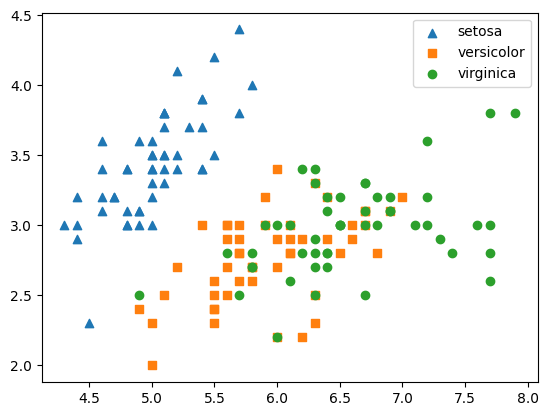

In [8]:
markers = ["^", "s", "o"]

for idx, marker in enumerate(markers):
    x = iris_df[iris_df["target"] == idx]["sepal_length"]
    y = iris_df[iris_df["target"] == idx]["sepal_width"]

    plt.scatter(x, y, marker=marker, label=iris.target_names[idx])

plt.legend()
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
iris_scaled = StandardScaler().fit_transform(iris_df)

In [11]:
from sklearn.decomposition import PCA

In [12]:
# 주성분 2개 추출
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

In [13]:
iris_pca.shape

(150, 2)

In [14]:
pca_columns = ["pca_components_1", "pca_components_2"]
iris_df_pca = pd.DataFrame(iris_pca, columns=pca_columns)
iris_df_pca["target"] = iris.target
iris_df_pca

,pca_components_1,pca_components_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0
...,...,...,...
145,2.233024,0.389352,2
146,1.966862,-0.896264,2
147,1.928996,0.268890,2
148,1.806149,1.009217,2


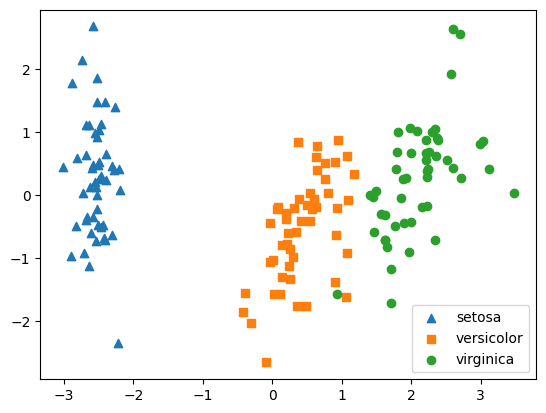

In [ ]:
# pca_components 압축시킨 차원의 특성이기 때문에 무엇이라고 표현하기 힘들다.
markers = ["^", "s", "o"]

for idx, marker in enumerate(markers):
    x = iris_df_pca[iris_df_pca["target"] == idx]["pca_components_1"]
    y = iris_df_pca[iris_df_pca["target"] == idx]["pca_components_2"]

    plt.scatter(x, y, marker=marker, label=iris.target_names[idx])

plt.legend()
plt.show()                                        

In [17]:
pca.components_

array([[ 0.44486332, -0.23336907,  0.50604293,  0.49689383,  0.49462368],
       [ 0.38197963,  0.92097203,  0.02871731,  0.07063728, -0.00936826]])

In [18]:
import seaborn as sns

<Axes: >

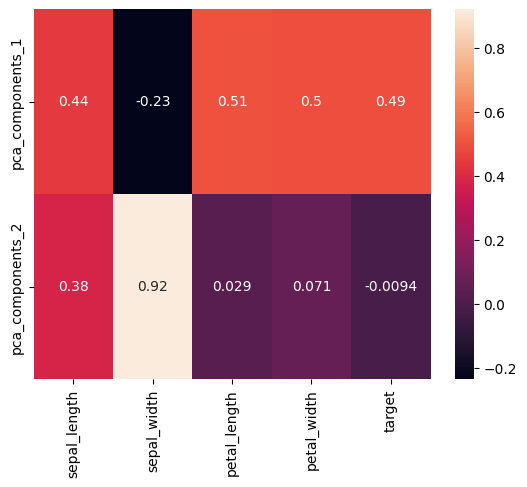

In [19]:
sns.heatmap(pca.components_, annot=True, xticklabels=iris_df.columns, yticklabels=iris_df_pca.columns[:-1])

In [20]:
# 분산 비율
pca.explained_variance_ratio_

array([0.76740358, 0.18282727])

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [22]:
model = RandomForestClassifier(random_state=1)

In [23]:
# 원본 데이터
score_origin = cross_val_score(model, iris.data, iris.target)
print(score_origin)
print(score_origin.mean())

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
0.9666666666666668


In [24]:
# pca 데이터
score_pca = cross_val_score(model, iris_df_pca.iloc[:, :-1], iris_df_pca.iloc[:, -1])
print(score_pca)
print(score_pca.mean())

[0.96666667 1.         1.         1.         1.        ]
0.9933333333333334
